<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/utils/Incidence_Angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Incidence Angle Correction**


This Jupyter Notebook explores masking UAVSAR data over the Verdugo Mountains in Los Angeles, CA. The content of this notebook is as follows:

0. [Running the Notebook](#s1)
1. [Download UAVSAR Data](#s2)
2. [Read in Data](#s3)
3. [Masking](#s4)

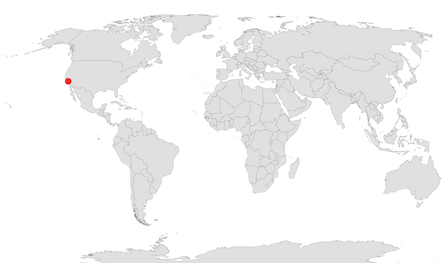

<a name="s1"></a>
## Running the Notebook
- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**. 
- Code cells that are required for the notebook to run without errors are marked numerically with <font color='red'> Run cell below </font> 

### Python Packages:
This routine uses the following python libraries. Some are already included in the Google Colab environment and others are installed in the cell below before imported. Downloading new python packages to this environment may take a few minutes to complete.

<font color='red'> 1. Run cell below </font> 

In [ ]:
## The packages will take around a minute to install
!pip install rasterio --quiet

import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

<a name="s2"></a>
# 1. Download UAVSAR Data

[Insert Description and Introduction]

In [ ]:
## UAVSAR Line SanAnd_08525 HV geotiffs
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Fire/SanAnd_08525_14158_003_141023_L090HVHV_CX_01.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Fire/SanAnd_08525_17122_003_171102_L090HVHV_CX_01.tif --quiet

## Line's corresponding local incidence angle files
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Fire/SanAnd_08525_inc_clip.tif --quiet

<a name="s3"></a>
## 2. Read in Data

Use the python package rasterio to open the UAVSAR Data

In [ ]:
def read_file(path):
  with rio.open(path) as ds:
    band = ds.read(1)
    return band

HV2014 = read_file('SanAnd_08525_14158_003_141023_L090HVHV_CX_01.tif')
HV2017 = read_file('SanAnd_08525_17122_003_171102_L090HVHV_CX_01.tif')
inc_angle = read_file('SanAnd_08525_inc_clip.tif')

Plot the HV and local incidence angle data

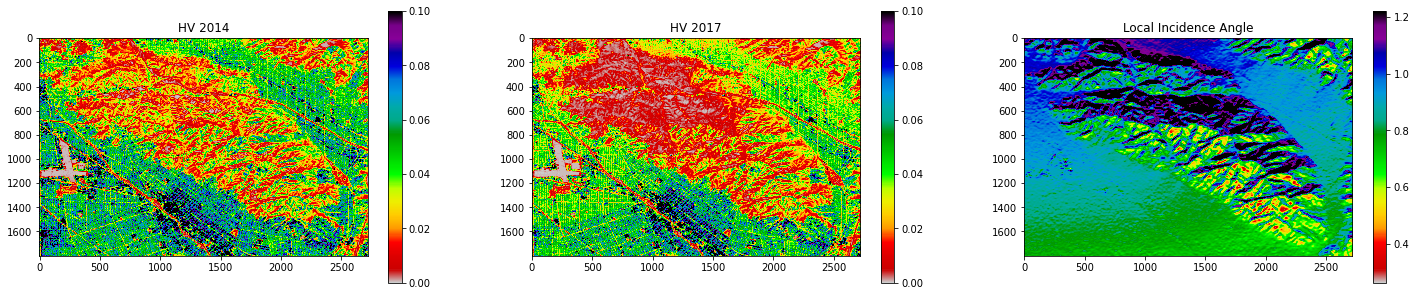

In [ ]:
cmap = 'nipy_spectral_r'
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,10))

vmin_HV=0
vmax_HV=0.1
vmin_inc = 0.261799 #15 degrees in radians
vmax_inc = 1.22173 #70 degrees in radians

# HV 2014
plot = ax1.imshow(HV2014,vmin=vmin_HV, vmax=vmax_HV, cmap=cmap)
ax1.set_title('HV 2014')
fig.colorbar(plot, ax=ax1, shrink=0.5)

# HV 2017
plot = ax2.imshow(HV2017, vmin=vmin_HV, vmax=vmax_HV,cmap=cmap)
ax2.set_title('HV 2017')
fig.colorbar(plot, ax=ax2, shrink=0.5)

# Local Incidence Angle
plot = ax3.imshow(inc_angle,vmin=vmin_inc, vmax=vmax_inc, cmap=cmap)
ax3.set_title('Local Incidence Angle')
fig.colorbar(plot, ax=ax3, shrink=0.5)

<a name="s4"></a>
## 2. Mask Local Incidence Angles
Mask local incidence angles less thann 15 and greater than 70.

In [ ]:
HV2014[inc_angle<0.261799]=np.nan # Masking less than 15 degrees in radians
HV2014[inc_angle>1.22173]=np.nan # Masking greater than 70 degrees in radians

HV2017[inc_angle<0.261799]=np.nan # Masking less than 15 degrees in radians
HV2017[inc_angle>1.22173]=np.nan # Masking greater than 70 degrees in radians

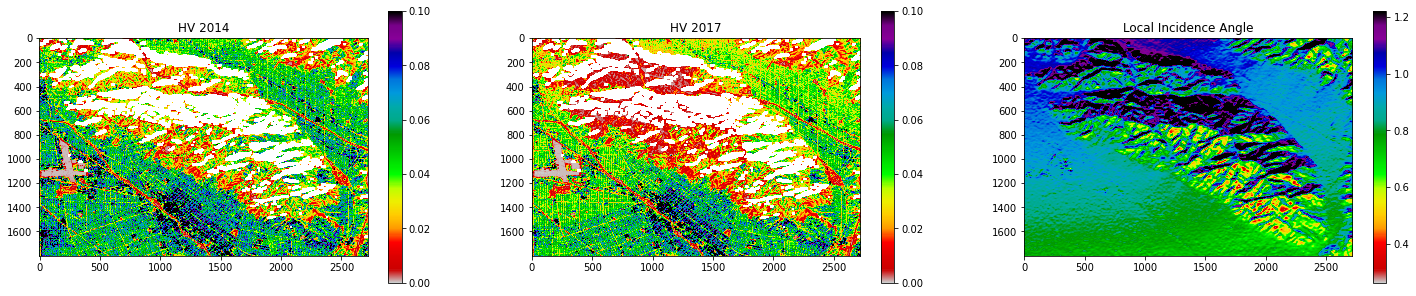

In [ ]:
cmap = 'nipy_spectral_r'
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,10))

vmin_HV=0
vmax_HV=0.1
vmin_inc = 0.261799 #15 degrees in radians
vmax_inc = 1.22173 #70 degrees in radians

# HV 2014
plot = ax1.imshow(HV2014,vmin=vmin_HV, vmax=vmax_HV, cmap=cmap)
ax1.set_title('HV 2014')
fig.colorbar(plot, ax=ax1, shrink=0.5)

# HV 2017
plot = ax2.imshow(HV2017, vmin=vmin_HV, vmax=vmax_HV,cmap=cmap)
ax2.set_title('HV 2017')
fig.colorbar(plot, ax=ax2, shrink=0.5)

# Local Incidence Angle
plot = ax3.imshow(inc_angle,vmin=vmin_inc, vmax=vmax_inc, cmap=cmap)
ax3.set_title('Local Incidence Angle')
fig.colorbar(plot, ax=ax3, shrink=0.5)